In [3]:
import pandas as pd



## 91

In [5]:
survey = pd.read_csv("../sample_100knocks/10章/survey.csv")
print(len(survey))
survey.head()

86


datetime            comment  satisfaction
0  2019/3/11  駅前に若者が集まっている(AA駅)             1
1  2019/2/25   スポーツできる場所があるのが良い             5
2  2019/2/18          子育て支援が嬉しい             5
3   2019/4/9    保育園に入れる（待機児童なし）             4
4   2019/1/6          駅前商店街が寂しい             2

In [6]:
survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [9]:
survey = survey.dropna()
survey.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

## 92

In [11]:
survey['comment'] = survey['comment'].str.replace('AA', '')
survey['comment'].head()

0     駅前に若者が集まっている(駅)
1    スポーツできる場所があるのが良い
2           子育て支援が嬉しい
3     保育園に入れる（待機児童なし）
4           駅前商店街が寂しい
Name: comment, dtype: object

In [13]:
survey['comment'] = survey['comment'].str.replace('\(.+?\)', '', regex=True)
survey['comment'].head()

0        駅前に若者が集まっている
1    スポーツできる場所があるのが良い
2           子育て支援が嬉しい
3     保育園に入れる（待機児童なし）
4           駅前商店街が寂しい
Name: comment, dtype: object

In [14]:
survey['comment'] = survey['comment'].str.replace('\（.+?\）', '', regex=True)
survey['comment'].head()

0        駅前に若者が集まっている
1    スポーツできる場所があるのが良い
2           子育て支援が嬉しい
3             保育園に入れる
4           駅前商店街が寂しい
Name: comment, dtype: object

## 93

In [15]:
survey['length'] = survey['comment'].str.len()
survey.head()

datetime           comment  satisfaction  length
0  2019/3/11      駅前に若者が集まっている             1      12
1  2019/2/25  スポーツできる場所があるのが良い             5      16
2  2019/2/18         子育て支援が嬉しい             5       9
3   2019/4/9           保育園に入れる             4       7
4   2019/1/6         駅前商店街が寂しい             2       9

(array([11., 24., 21., 10.,  6.,  6.,  5.,  0.,  0.,  1.]),
 array([ 4. ,  8.6, 13.2, 17.8, 22.4, 27. , 31.6, 36.2, 40.8, 45.4, 50. ]),
 <a list of 10 Patch objects>)

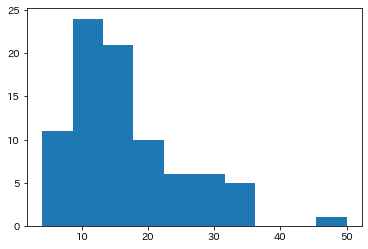

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(survey["length"])

In [24]:
import MeCab
tagger = MeCab.Tagger()
text = "すもももももももものうち"
words = tagger.parse(text)
words

'すもももももももものうち\t\udcb5\udcad\udcb9\udce6,\udcb0\udcec\udcc8\udccc,*,*,*,*,*\nEOS\n'

In [25]:
words = tagger.parse(text).splitlines()
words_arr = []
for i in words:
    if i == 'EOS': continue
    word_tmp = i.split()[0]
    words_arr.append(word_tmp)
words_arr

['すもももももももものうち']